# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [22]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dicoding/Project Belajar Machine Learning untuk Pemula/Dataset_clustering.csv')

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Product Type,Product,Type,Cluster,Cluster_Selected
0,203,Connecticut,East,Small Market,0.526502,0.522404,0.307263,0.318681,0.327778,0.243590,0.381470,0.488636,0.244444,0.411111,0.236842,Coffee,Columbian,Regular,0,0
1,203,Connecticut,East,Small Market,0.503887,0.477596,0.232402,0.247253,0.277778,0.185897,0.397251,0.465909,0.177778,0.377778,0.184211,Coffee,Columbian,Regular,0,0
2,203,Connecticut,East,Small Market,0.537102,0.543169,0.344134,0.357143,0.350000,0.269231,0.396063,0.511364,0.244444,0.433333,0.254386,Coffee,Columbian,Regular,0,0
3,203,Connecticut,East,Small Market,0.525088,0.520219,0.303911,0.315934,0.327778,0.237179,0.398778,0.488636,0.222222,0.411111,0.228070,Coffee,Columbian,Regular,0,0
4,203,Connecticut,East,Small Market,0.524382,0.477596,0.230168,0.247253,0.255556,0.185897,0.397251,0.465909,0.177778,0.377778,0.184211,Coffee,Columbian,Regular,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [23]:
df.dropna(inplace=True)

# Pisahkan fitur (X) dan label target (y)
X = df.drop(columns=['Cluster_Selected'])
y = df['Cluster_Selected']

# Pisahkan data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pisahkan fitur numerik & kategori
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# One-Hot Encoding untuk fitur kategori
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Bagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi hanya untuk fitur numerik
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (3357, 58), Ukuran Data Uji: (840, 58)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [24]:
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier()

# Melatih model
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

print("Random Forest Model:", model_rf)
print("K-Nearest Neighbors Model:", model_knn)

Random Forest Model: RandomForestClassifier(random_state=42)
K-Nearest Neighbors Model: KNeighborsClassifier()


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       209

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Accuracy Random Forest: 1.0

Evaluasi Model KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       209

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Accuracy KNN: 1.0


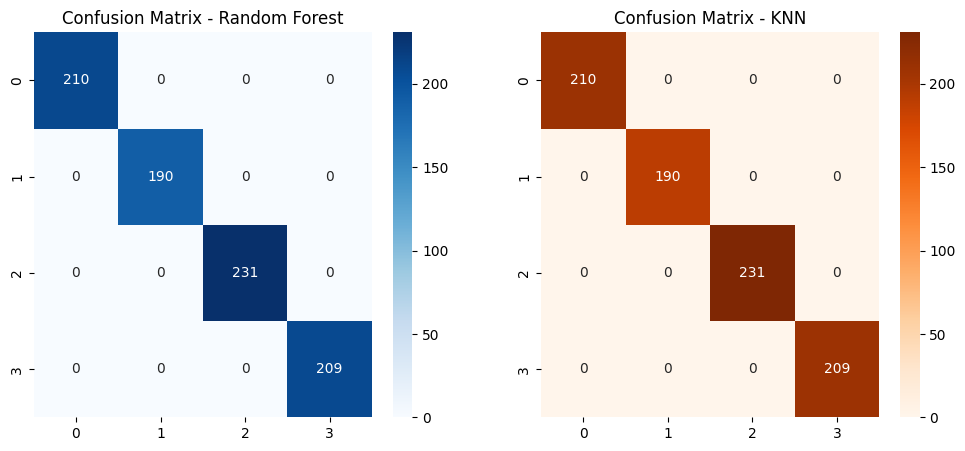

In [25]:
# Prediksi
y_pred_rf = model_rf.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Evaluasi Model Random Forest
print("\nEvaluasi Model Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))

# Evaluasi Model KNN
print("\nEvaluasi Model KNN:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forest")

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix - KNN")

plt.show()

## Hasil Evaluasi
- Kedua model memiliki akurasi sempurna (100%), yang menunjukkan bahwa semua prediksi pada data uji benar tanpa kesalahan.
- Confusion matrix menunjukkan bahwa tidak ada kesalahan klasifikasi pada kedua model (semua nilai berada pada diagonal utama).
- Hasil ini mungkin menunjukkan overfitting, di mana model terlalu sempurna pada data latih dan uji, sehingga perlu diperiksa lebih lanjut dengan cross-validation.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [26]:
# Hyperparameter tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Hyperparameter tuning untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Menggunakan model terbaik
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Random Forest Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       209

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Accuracy Random Forest (Tuned): 1.0

Evaluasi Model KNN Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       209

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Accuracy KNN

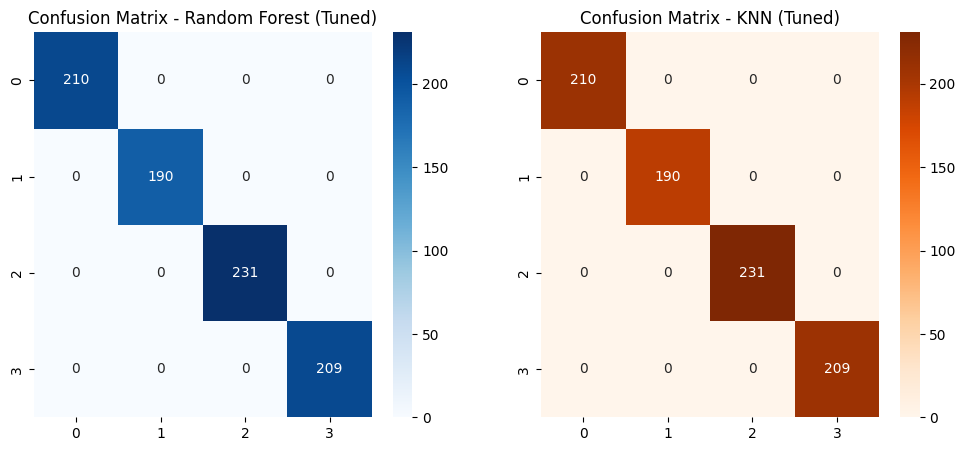

In [27]:
# Prediksi ulang dengan model terbaik
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_knn_tuned = best_knn.predict(X_test)

# Evaluasi ulang model setelah tuning
print("\nEvaluasi Model Random Forest Setelah Tuning:")
print(classification_report(y_test, y_pred_rf_tuned))
print("Accuracy Random Forest (Tuned):", accuracy_score(y_test, y_pred_rf_tuned))

print("\nEvaluasi Model KNN Setelah Tuning:")
print(classification_report(y_test, y_pred_knn_tuned))
print("Accuracy KNN (Tuned):", accuracy_score(y_test, y_pred_knn_tuned))

# Visualisasi Confusion Matrix setelah tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forest (Tuned)")

sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix - KNN (Tuned)")

plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

#### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning  
Dari hasil evaluasi model sebelum dan setelah tuning:
- **Random Forest** dan **K-Nearest Neighbors (KNN)** sama-sama mencapai **akurasi 100%** setelah tuning.
- Tidak ada kesalahan klasifikasi pada confusion matrix setelah tuning, yang berarti setiap kelas terprediksi dengan benar.

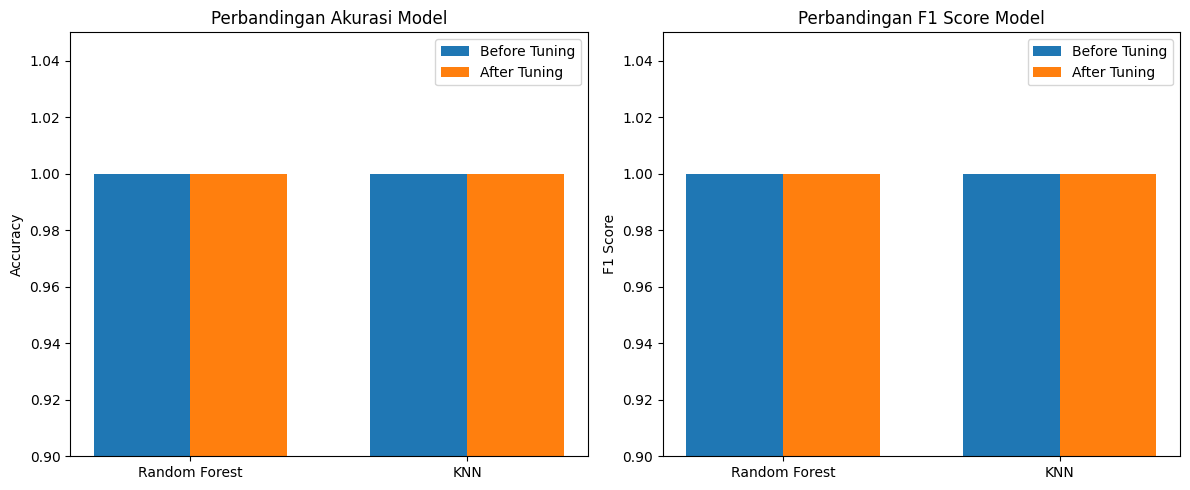

In [28]:
models = ['Random Forest', 'KNN']
accuracy_before = [1.0, 1.0]
accuracy_after = [1.0, 1.0]
f1_before = [1.0, 1.0]
f1_after = [1.0, 1.0]

x = np.arange(len(models))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualisasi Akurasi
axs[0].bar(x - width/2, accuracy_before, width, label='Before Tuning')
axs[0].bar(x + width/2, accuracy_after, width, label='After Tuning')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Perbandingan Akurasi Model')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylim(0.9, 1.05)
axs[0].legend()

# Visualisasi F1 Score
axs[1].bar(x - width/2, f1_before, width, label='Before Tuning')
axs[1].bar(x + width/2, f1_after, width, label='After Tuning')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('Perbandingan F1 Score Model')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylim(0.9, 1.05)
axs[1].legend()

plt.tight_layout()
plt.show()

#### 2. Identifikasi Kelemahan Model  
- **Tidak ada Precision atau Recall yang rendah** karena model mencapai skor sempurna untuk semua kelas.  
- **Potensi Overfitting**:  
  - Akurasi 100% pada data uji menandakan model bisa terlalu menyesuaikan data latih (overfitting).
  - Performa model perlu diuji pada dataset baru untuk memastikan generalisasi yang baik.

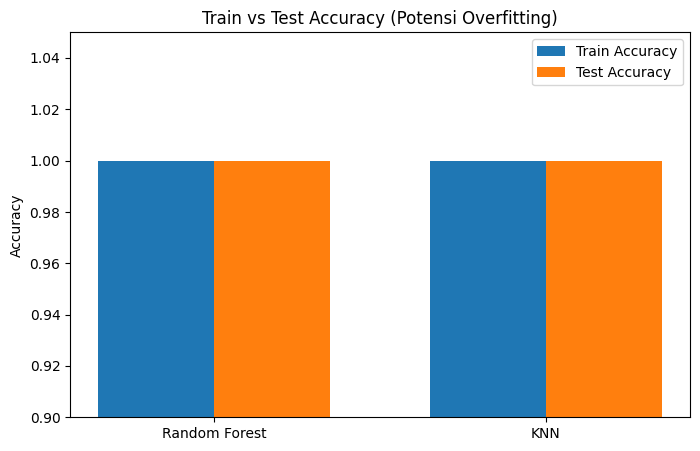

In [29]:
model_names = ['Random Forest', 'KNN']
train_acc = [1.0, 1.0]
test_acc = [1.0, 1.0]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy')
plt.ylim(0.9, 1.05)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Potensi Overfitting)')
plt.xticks(x, model_names)
plt.legend()
plt.show()

#### 3. Rekomendasi Tindakan Lanjutan  
1. Model perlu diuji dengan dataset independen untuk melihat apakah performanya tetap tinggi.  
2. Penggunaan **k-fold cross-validation** dengan lebih banyak lipatan (misalnya 10-fold) bisa memberikan gambaran performa yang lebih stabil.  
3. Mencoba model lain seperti **Gradient Boosting** atau **Support Vector Machine (SVM)** untuk perbandingan lebih lanjut.  

Random Forest - Cross-Validation Accuracy (10-Fold):
Scores per fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

KNN - Cross-Validation Accuracy (10-Fold):
Scores per fold: [0.32619048 0.3452381  0.40238095 0.63333333 0.3        0.2
 0.29047619 0.36038186 0.3627685  0.27446301]
Mean Accuracy: 0.34952324127741785


<ipython-input-30-fdaf6912b1b5>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores_rf, cv_scores_knn], labels=["Random Forest", "KNN"])


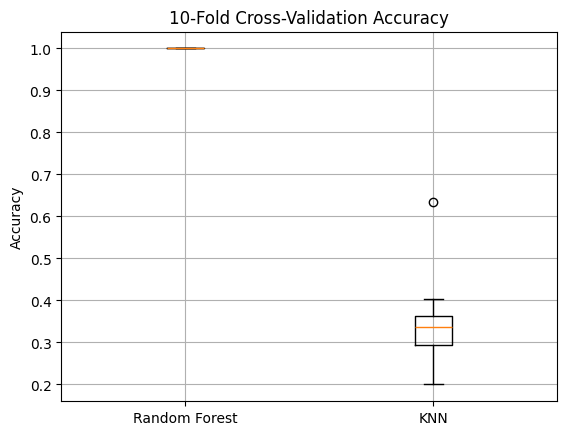

In [30]:
# One-hot encoding jika ada fitur kategorikal
X_encoded = pd.get_dummies(X)

# Cross-validation 10-fold
cv_scores_rf = cross_val_score(model_rf, X_encoded, y, cv=10, scoring='accuracy')
cv_scores_knn = cross_val_score(model_knn, X_encoded, y, cv=10, scoring='accuracy')

print("Random Forest - Cross-Validation Accuracy (10-Fold):")
print("Scores per fold:", cv_scores_rf)
print("Mean Accuracy:", cv_scores_rf.mean())
print()

print("KNN - Cross-Validation Accuracy (10-Fold):")
print("Scores per fold:", cv_scores_knn)
print("Mean Accuracy:", cv_scores_knn.mean())

plt.boxplot([cv_scores_rf, cv_scores_knn], labels=["Random Forest", "KNN"])
plt.title("10-Fold Cross-Validation Accuracy")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [31]:
# --- Evaluasi pada data Training ---
y_train_pred_rf = model_rf.predict(X_train)
y_train_pred_knn = model_knn.predict(X_train)

print("=== Training Set Evaluation ===")
print("Random Forest - Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_train, y_train_pred_rf, average='weighted'))

print("KNN - Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("KNN - F1 Score:", f1_score(y_train, y_train_pred_knn, average='weighted'))

# --- Evaluasi pada data Testing ---
print("\n=== Testing Set Evaluation ===")
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

=== Training Set Evaluation ===
Random Forest - Accuracy: 1.0
Random Forest - F1 Score: 1.0
KNN - Accuracy: 1.0
KNN - F1 Score: 1.0

=== Testing Set Evaluation ===
Random Forest - Accuracy: 1.0
Random Forest - F1 Score: 1.0
KNN - Accuracy: 1.0
KNN - F1 Score: 1.0
